In [176]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [177]:
%cd /content/gdrive/MyDrive/Colab Notebooks/final

/content/gdrive/MyDrive/Colab Notebooks/final


In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [179]:
df_fire = pd.read_csv('forestfires.csv')
df_fire.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [180]:
# feature scalling of the Area using log(n) + 1
df_fire['u_area'] = np.log(df_fire['area'] + 1)
df_fire.drop(columns = 'area', inplace = True)
df_fire.tail()



,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,u_area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.000000


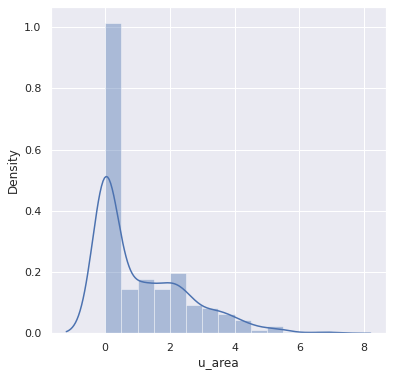

In [137]:
plt.rcParams['figure.figsize'] = [6, 6]
sns.distplot(df_fire['u_area']);


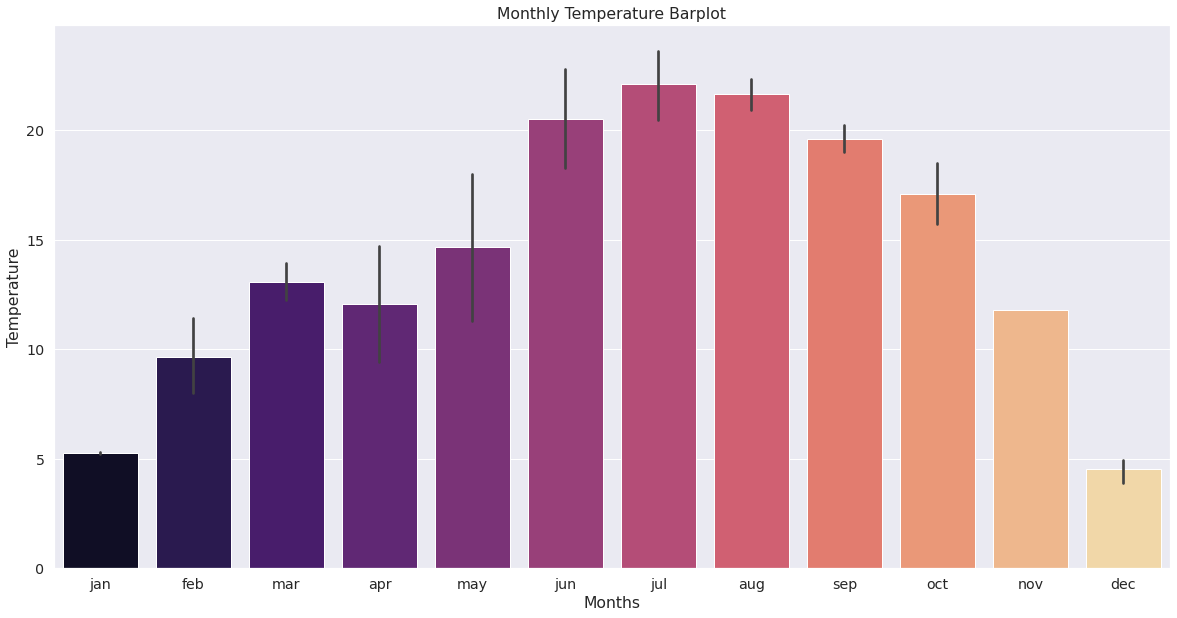

In [138]:
#Monthly Temperature using barplot
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = df_fire,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'magma');
month_temp.set(title = "Monthly Temperature Barplot", xlabel = "Months", ylabel = "Temperature");

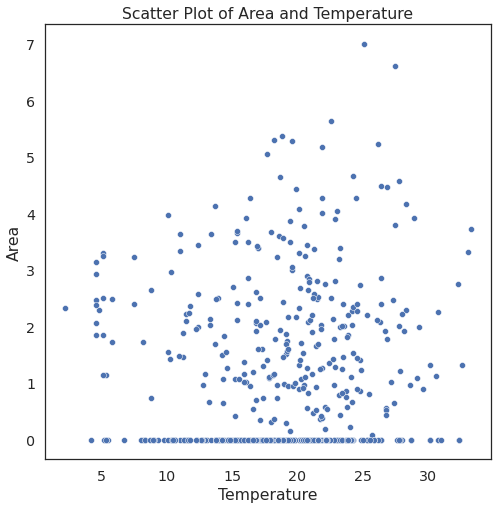

In [139]:
#Scatter plot forest fire area and temperature
plt.rcParams['figure.figsize'] = [8, 8]
sns.set(style = "white", font_scale = 1.3)
scat = sns.scatterplot(df_fire['temp'], df_fire['u_area'])
scat.set(title = "Scatter Plot of Area and Temperature", xlabel = "Temperature", ylabel = "Area");

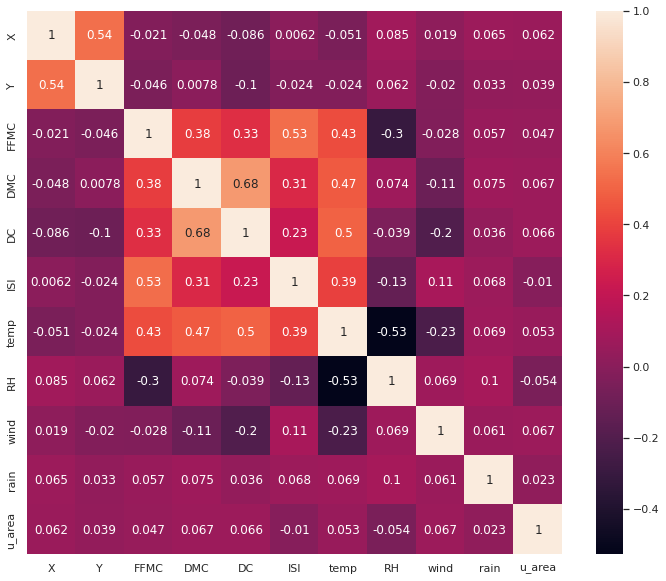

In [140]:
#Heat map Forest Fires
plt.rcParams['figure.figsize'] = [12, 10]
sns.set(font_scale = 1)
sns.heatmap(df_fire.corr(), annot = True);

In [141]:
df_fire = df_fire.drop(['DC'], axis = 1)


In [142]:
# One Hot encoding

# Months
df_fire['month'].replace({'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6,
                           'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12},
                           inplace = True)

# Days
df_fire['day'].replace({'sun' : 1, 'mon' : 2, 'tue' : 3, 'wed' : 4, 'thu' : 5, 'fri' : 6, 'sat' : 7}, inplace = True)


df_fire.head(10)

,X,Y,month,day,FFMC,DMC,ISI,temp,RH,wind,rain,u_area
0,7,5,3,6,86.2,26.2,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,3,90.6,35.4,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,7,90.6,43.7,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,6,91.7,33.3,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,1,89.3,51.3,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,1,92.3,85.3,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,2,92.3,88.9,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,2,91.5,145.4,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,3,91.0,129.5,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,7,92.5,88.0,7.1,22.8,40,4.0,0.0,0.0


In [174]:
target = df_fire['u_area']
features = df_fire.drop(columns = 'u_area')

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 100)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 100)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)
X_train.head()

Train data set size :  (361, 11)
Test data set size :  (156, 11)


,X,Y,month,day,FFMC,DMC,ISI,temp,RH,wind,rain
124,3,4,9,6,94.3,85.1,15.9,19.8,50,5.4,0.0
209,8,3,9,5,93.7,80.9,17.9,23.2,26,4.9,0.0
329,4,3,9,7,92.2,102.3,8.4,23.5,27,4.0,0.0
397,5,6,8,1,91.6,181.3,7.6,24.3,33,3.6,0.0
488,4,4,8,3,95.1,141.3,17.7,19.4,71,7.6,0.0


In [173]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, predictions))
print ("r2 Score : ", r2_score(y_test, predictions))

#score
print("Accuracy -- ", model.score(X_test, y_test)*100)



Mean Squared Error :  1.9188977272202181
r2 Score :  -0.0781919154160009
Accuracy --  -7.81919154160009
